In [43]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
torch.cuda.empty_cache()

import matplotlib.pyplot as plt
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'
random_seed = 420
torch.manual_seed(random_seed)

In [49]:
from PIL import Image

im = np.array(Image.open('pearl_small.jpg'))
#im = np.delete(im, 0, axis=0)
im = np.mean(im, axis = 2)/25
print(im.shape)

(150, 150)


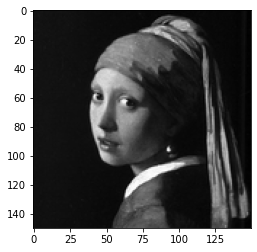

In [50]:
plt.imshow(im, cmap = 'gray')

In [70]:
def uniform_initializer(out_dim, in_dim, cuda = True):
    tensor = torch.empty(out_dim, in_dim)
    if cuda:
        return torch.nn.init.uniform_(tensor, a=-2, b=2).cuda()
    else: 
        return torch.nn.init.uniform_(tensor, a=-2, b=2)
    
class simple_encoder():
    def __init__(self, out_dim, in_dim, cuda = True):
        self.W = uniform_initializer(out_dim, in_dim, cuda)
        
    def apply(self, X):
        #print(X.shape)
        #print(self.W.shape)
        return torch.matmul(self.W, X)
    
class simple_encoder_wthreshold():
    def __init__(self, out_dim, in_dim, epsilon, cuda = True):
        self.W = uniform_initializer(out_dim, in_dim, cuda)
        self.epsilon = epsilon
        
    def apply(self, X):
        #print(X.shape)
        #print(self.W.shape)
        print(self.W.dtype)
        return (torch.matmul(self.W, X) > self.epsilon).float()
    
    def apply_wo_threshold(self, X):
        return torch.matmul(self.W, X)
    
def visualize(s):
    fig = plt.figure()
    plt.imshow(s, cmap='gray', interpolation='none')

torch.Size([150, 150])


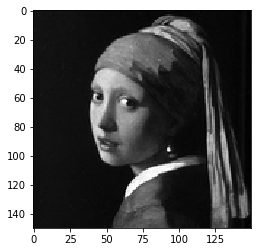

In [75]:
samples = torch.tensor(im, dtype = torch.float32)
print(samples.shape)
visualize(samples)

In [76]:
print(samples)

tensor([[0.8933, 0.8133, 0.8533,  ..., 0.2533, 0.1733, 0.1333],
        [0.9333, 0.8533, 0.8533,  ..., 0.2533, 0.1333, 0.2133],
        [0.8933, 0.8933, 0.7733,  ..., 0.2133, 0.1733, 0.1733],
        ...,
        [0.8133, 0.7733, 0.6933,  ..., 0.2133, 0.1600, 0.2133],
        [0.7733, 0.7333, 0.6933,  ..., 0.2533, 0.2133, 0.2133],
        [0.7733, 0.7333, 0.6933,  ..., 0.2133, 0.1333, 0.1733]])


In [79]:
l = samples.shape[0]
encoder = simple_encoder_wthreshold(l*l*25, l*l, 0,False)

torch.float32
torch.Size([562500])
torch.Size([750, 750])


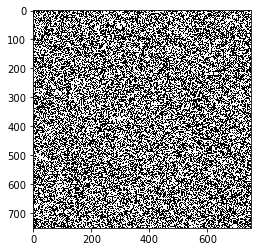

In [81]:
encoded_s = encoder.apply(samples.view(l*l))
print(encoded_s.shape)
encoded_s = encoded_s.T.view(l*5,l*5)
print(encoded_s.shape)
visualize(encoded_s)

torch.Size([562500])
torch.Size([750, 750])


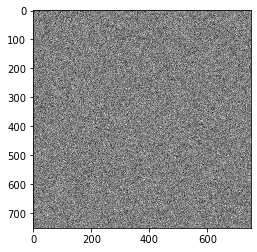

In [83]:
encoded_wo = encoder.apply_wo_threshold(samples.view(l*l))
print(encoded_wo.shape)
encoded_wo = encoded_wo.T.view(l*5,l*5)
print(encoded_wo.shape)
visualize(encoded_wo)

In [90]:
count_black = np.sum(encoded_s.numpy()) #histogram(encoded_s[0], bins=3)
count_white = l*l*25 - count_black

280517.0 281983.0


<BarContainer object of 2 artists>

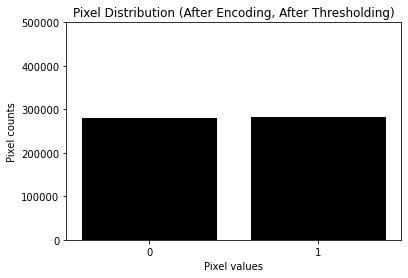

In [128]:
print(count_black, count_white)
plt.ylim([0, 500000])
plt.title("Pixel Distribution (After Encoding, After Thresholding)")
plt.xlabel("Pixel values")
plt.ylabel("Pixel counts")
plt.bar(['0', '1'], [count_black, count_white], color = 'black')
#plt.show()

(array([4.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        3.0000e+00, 4.0000e+00, 7.0000e+00, 6.0000e+00, 1.6000e+01,
        2.2000e+01, 2.5000e+01, 2.6000e+01, 4.9000e+01, 5.8000e+01,
        1.0000e+02, 1.2100e+02, 1.7700e+02, 2.2800e+02, 3.0000e+02,
        4.1300e+02, 4.8700e+02, 6.7400e+02, 8.2000e+02, 1.0660e+03,
        1.3270e+03, 1.6460e+03, 1.9700e+03, 2.4910e+03, 3.0760e+03,
        3.5780e+03, 4.3380e+03, 5.2030e+03, 5.8960e+03, 6.8970e+03,
        8.0760e+03, 9.3410e+03, 1.0277e+04, 1.1476e+04, 1.2805e+04,
        1.4208e+04, 1.5352e+04, 1.6460e+04, 1.7483e+04, 1.8594e+04,
        1.9421e+04, 2.0090e+04, 2.0631e+04, 2.1288e+04, 2.1660e+04,
        2.1450e+04, 2.1354e+04, 2.0866e+04, 2.0137e+04, 1.9666e+04,
        1.8657e+04, 1.7742e+04, 1.6567e+04, 1.5477e+04, 1.4497e+04,
        1.3051e+04, 1.2095e+04, 1.0482e+04, 9.7590e+03, 8.4460e+03,
        7.3540e+03, 6.2580e+03, 5.5070e+03, 4.5050e+03, 4.0050e+03,
        3.2510e+03, 2.6660e+03, 2.1930e+03, 1.87

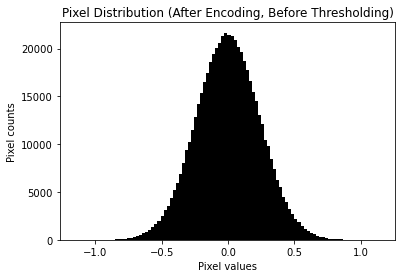

In [134]:
plt.title("Pixel Distribution (After Encoding, Before Thresholding)")
plt.xlabel("Pixel values")
plt.ylabel("Pixel counts")
plt.hist(encoded_wo.flatten().numpy()/2000, 100, color = 'black')

(array([ 227.,  315.,  778., 1828., 2161., 2829., 3743., 1684.,  633.,
         364.,  304.,  199.,  152.,  166.,  127.,  119.,  131.,  120.,
         135.,   84.,  136.,  113.,  139.,  162.,  116.,  118.,  109.,
         151.,  147.,  144.,  164.,  162.,  200.,  167.,  152.,  159.,
         151.,  157.,  166.,  148.,  187.,  139.,  138.,  125.,  135.,
         127.,   96.,   97.,   92.,  113.,   97.,   85.,  106.,   83.,
          92.,  109.,   73.,   96.,   91.,   84.,   81.,   74.,   56.,
          50.,   59.,   34.,   47.,   45.,   47.,   46.,   39.,   26.,
          29.,   24.,   23.,   37.,   32.,   38.,   30.,   43.,   40.,
          39.,   36.,   37.,   12.,   18.,   10.,    6.,    7.,   14.,
           5.,   10.,   10.,   18.,   21.,   26.,   29.,   27.,   32.,
          18.]),
 array([0.008     , 0.01812   , 0.02824   , 0.03836   , 0.04848   ,
        0.0586    , 0.06872   , 0.07883999, 0.08896   , 0.09908   ,
        0.1092    , 0.11932   , 0.12944   , 0.13956   , 0.14968   

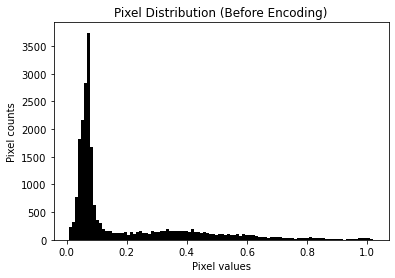

In [135]:
plt.title("Pixel Distribution (Before Encoding)")
plt.xlabel("Pixel values")
plt.ylabel("Pixel counts")
plt.hist(samples.flatten().numpy()/10, 100, color = 'black')

In [124]:
def pixel_correlation_vertical(image):
    #image is WxH numpy array
    x = []
    y = []
    for i in range(W):
        for j in range(H-1):
            x = image[j][i]
            y = image[j+1][i]
    plt.scatter(x, y)
    
def pixel_correlation_adjacent(flattened_image, title = "Adjacent Pixels Correlations (Before Encoding)"):
    #image is WxH numpy array
    x = []
    y = []
    l = flattened_image.size
    for i in range(l-1):
            x.append(flattened_image[i])
            y.append(flattened_image[i+1])
    plt.title(title)
    plt.xlabel("Pixel values")
    plt.ylabel("Pixel values")
    plt.scatter(x, y, color = 'black', s = 0.1)
    
def pixel_correlation_binary(flattened_image):
    #image is WxH numpy array
    cate = [0,0,0,0]
    l = flattened_image.size
    for i in range(l-1):
        this = flattened_image[i]
        nex = flattened_image[i+1]
        if this == 1 and nex == 1:
            cate[0] +=1
        elif this == 1 and nex == 0:
            cate[1] +=1
        elif this == 0 and nex == 1:
            cate[2] +=1
        elif this == 0 and nex == 0:
            cate[3] +=1
    plt.ylim([0, 200000])
    plt.title("Adjacent Pixels Correlations (After Encoding, After Thresholding)")
    plt.xlabel("Pixel values")
    plt.ylabel("Pixel counts")
    plt.bar(['1-1', '1-0', '0-1', '0-0'], cate, color = 'black')

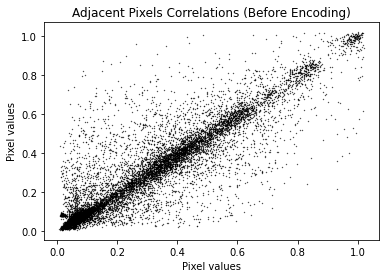

In [125]:
pixel_correlation_adjacent(samples.flatten().numpy()/10)

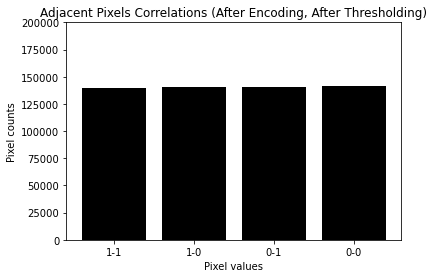

In [126]:
pixel_correlation_binary(encoded_s.flatten().numpy())

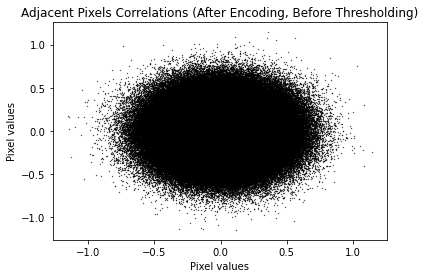

In [127]:
pixel_correlation_adjacent(encoded_wo.flatten().numpy()/2000, "Adjacent Pixels Correlations (After Encoding, Before Thresholding)")